In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import sys
import os
sys.path.append('..')

from cifar10_classification import dataset, features, visualize_features, train, metrics, plots, config

# Vérifier les chemins configurés
print(config.PROJ_ROOT)
print(config.DATA_DIR)
print(config.MODELS_DIR)

2024-06-10 22:24:52.346 | INFO     | cifar10_classification.config:<module>:11 - PROJ_ROOT path is: /home/victor/Epita/ING2/MLRF/cifar10_classification


/home/victor/Epita/ING2/MLRF/cifar10_classification
/home/victor/Epita/ING2/MLRF/cifar10_classification/data
/home/victor/Epita/ING2/MLRF/cifar10_classification/models


In [2]:
%load_ext autoreload
%autoreload 2

import importlib
importlib.reload(visualize_features)
importlib.reload(dataset)
importlib.reload(features)
importlib.reload(train)
importlib.reload(metrics)
importlib.reload(plots)

<module 'cifar10_classification.plots' from '/home/victor/Epita/ING2/MLRF/cifar10_classification/cifar10_classification/plots.py'>

In [3]:
x_train, y_train, x_test, y_test = dataset.prepare_data(Path(config.RAW_DATA_DIR) / 'cifar-10-batches-py', config.INTERIM_DATA_DIR)

2024-06-10 22:24:53,114 - INFO - Loading and preprocessing data...
2024-06-10 22:25:00,234 - INFO - Data preparation completed.


In [4]:
x_train_flat, x_train_pca, vr_train, x_train_hog, x_test_flat, x_test_pca, vr_test, x_test_hog = features.extract_and_save_features(x_train, y_train, x_test, y_test, config.PROCESSED_DATA_DIR)

2024-06-10 22:25:00,253 - INFO - Flattening images...
2024-06-10 22:25:00,509 - INFO - Flattening images...
2024-06-10 22:25:00,560 - INFO - Saving features to /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/flattened/train...
2024-06-10 22:25:06,814 - INFO - Saving features to /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/flattened/test...
2024-06-10 22:25:07,480 - INFO - Extracting PCA features with 50 components...
2024-06-10 22:25:07,481 - INFO - Flattening images...
2024-06-10 22:25:11,598 - INFO - Extracting PCA features with 50 components...
2024-06-10 22:25:11,599 - INFO - Flattening images...
2024-06-10 22:25:13,851 - INFO - Saving features to /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/pca/train...
2024-06-10 22:25:13,924 - INFO - Saving features to /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/pca/test...
2024-06-10 22:25:13,936 - INFO - Extracting HOG features...
2024-06-10 22:25:28,176 - IN

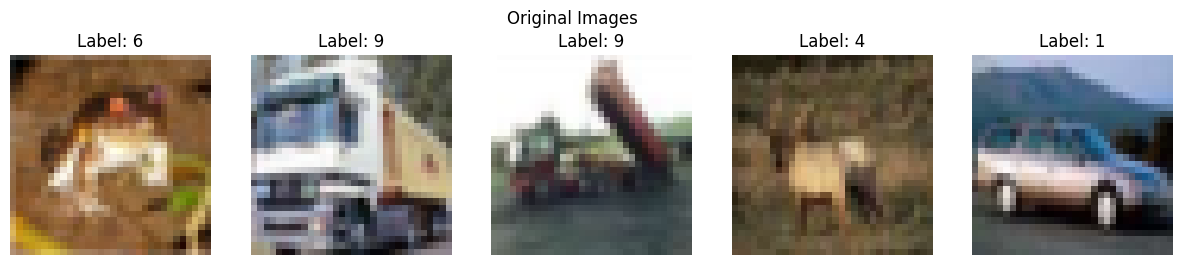

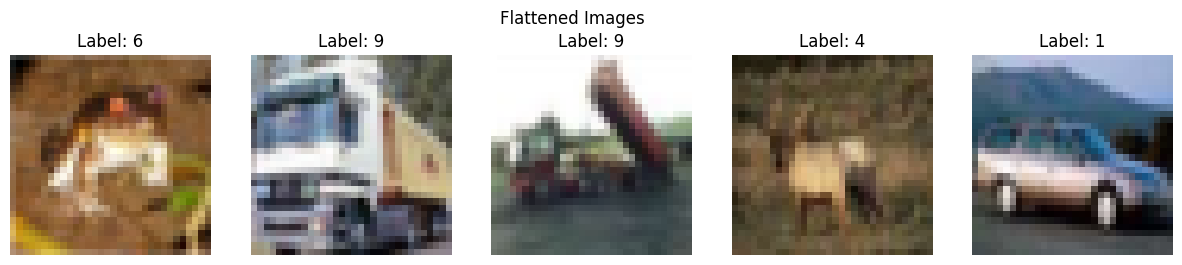

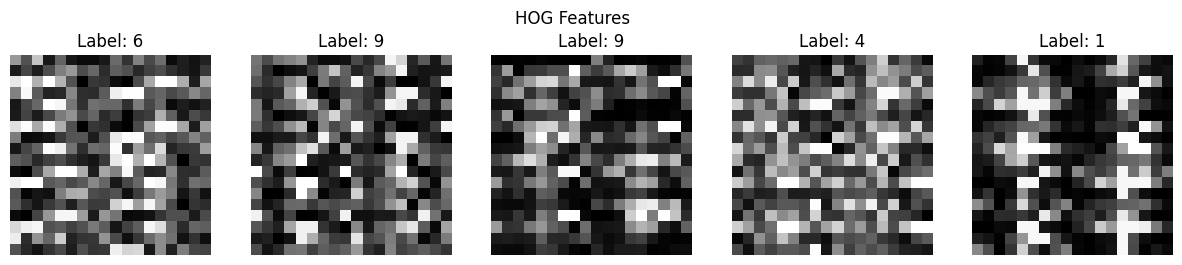

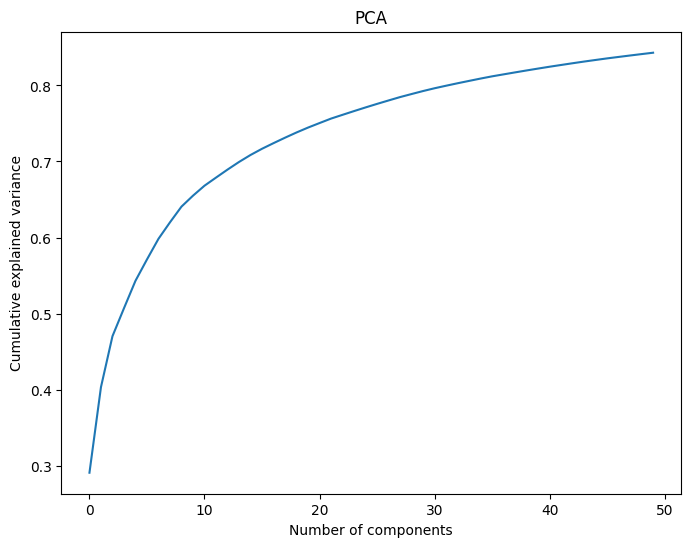

In [5]:
visualize_features.visualize_original_images(config.INTERIM_DATA_DIR, save=False)
visualize_features.visualize_flattened(x_train_flat, y_train, save=False)
visualize_features.visualize_hog(x_train_hog, y_train, save=False)
visualize_features.visualize_pca(vr_train, save=False)

In [6]:
train.run_training(config.PROCESSED_DATA_DIR, use_hyperparameter_search=False, subset_size=1000)

2024-06-10 22:25:31,810 - INFO - Loading data from /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/flattened...


2024-06-10 22:25:31,940 - INFO - Training LogisticRegression on flattened data...
2024-06-10 22:26:56,620 - INFO - Evaluating LogisticRegression on flattened data...
2024-06-10 22:26:56,685 - INFO - Classification Report for LogisticRegression on flattened:
              precision    recall  f1-score   support

           0       0.33      0.36      0.34       103
           1       0.38      0.34      0.36        89
           2       0.15      0.16      0.15       100
           3       0.16      0.17      0.16       103
           4       0.21      0.24      0.23        90
           5       0.18      0.15      0.17        86
           6       0.27      0.27      0.27       112
           7       0.34      0.31      0.33       102
           8       0.37      0.42      0.39       106
           9       0.35      0.31      0.33       109

    accuracy                           0.28      1000
   macro avg       0.28      0.27      0.27      1000
weighted avg       0.28      0.28     

In [7]:
results = metrics.main(config.PROCESSED_DATA_DIR, config.MODELS_DIR, False)
results_df = pd.DataFrame(results)
display(results_df)

2024-06-10 22:27:00,832 - INFO - Processing method: flattened
2024-06-10 22:27:00,832 - INFO - Loading data from /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/flattened...
2024-06-10 22:27:00,856 - INFO - Processing classifier: LogisticRegression for method: flattened
2024-06-10 22:27:00,857 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/LogisticRegression_flattened.joblib
2024-06-10 22:27:00,858 - INFO - Evaluating model LogisticRegression on flattened data...
2024-06-10 22:27:00,990 - INFO - Classification Report for LogisticRegression on flattened:
              precision    recall  f1-score   support

           0       0.31      0.33      0.32      1000
           1       0.38      0.31      0.34      1000
           2       0.21      0.23      0.22      1000
           3       0.20      0.17      0.18      1000
           4       0.23      0.28      0.25      1000
           5       0.22      0.18      0.20      1000
  

,model,data_type,accuracy,f1_score,precision,recall,classification_report
0,LogisticRegression,flattened,0.2845,0.283143,0.284769,0.2845,precision recall f1-score ...
1,NaiveBayes,flattened,0.2894,0.269443,0.298107,0.2894,precision recall f1-score ...
2,SVM,flattened,0.3603,0.352750,0.355591,0.3603,precision recall f1-score ...
3,DummyClassifier,flattened,0.1000,0.018182,0.010000,0.1000,precision recall f1-score ...
4,LogisticRegression,pca,0.2067,0.204265,0.202955,0.2067,precision recall f1-score ...
5,NaiveBayes,pca,0.2373,0.232224,0.239245,0.2373,precision recall f1-score ...
6,SVM,pca,0.2853,0.277539,0.277937,0.2853,precision recall f1-score ...
7,DummyClassifier,pca,0.1000,0.018182,0.010000,0.1000,precision recall f1-score ...
8,LogisticRegression,hog,0.4336,0.427527,0.426768,0.4336,precision recall f1-score ...
9,NaiveBayes,hog,0.4263,0.423560,0.431339,0.4263,precision recall f1-score ...


2024-06-10 22:37:22,046 - INFO - Processing method: flattened
2024-06-10 22:37:22,046 - INFO - Loading data from /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/flattened...


2024-06-10 22:37:22,075 - INFO - Processing classifier: LogisticRegression for method: flattened
2024-06-10 22:37:22,075 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/LogisticRegression_flattened.joblib
2024-06-10 22:37:22,076 - INFO - Processing classifier: NaiveBayes for method: flattened
2024-06-10 22:37:22,077 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/NaiveBayes_flattened.joblib
2024-06-10 22:37:22,078 - INFO - Processing classifier: SVM for method: flattened
2024-06-10 22:37:22,078 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/SVM_flattened.joblib
2024-06-10 22:37:22,085 - INFO - Processing classifier: DummyClassifier for method: flattened
2024-06-10 22:37:22,086 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/DummyClassifier_flattened.joblib
2024-06-10 22:37:22,088 - INFO - Generating combined ROC curves for flattene

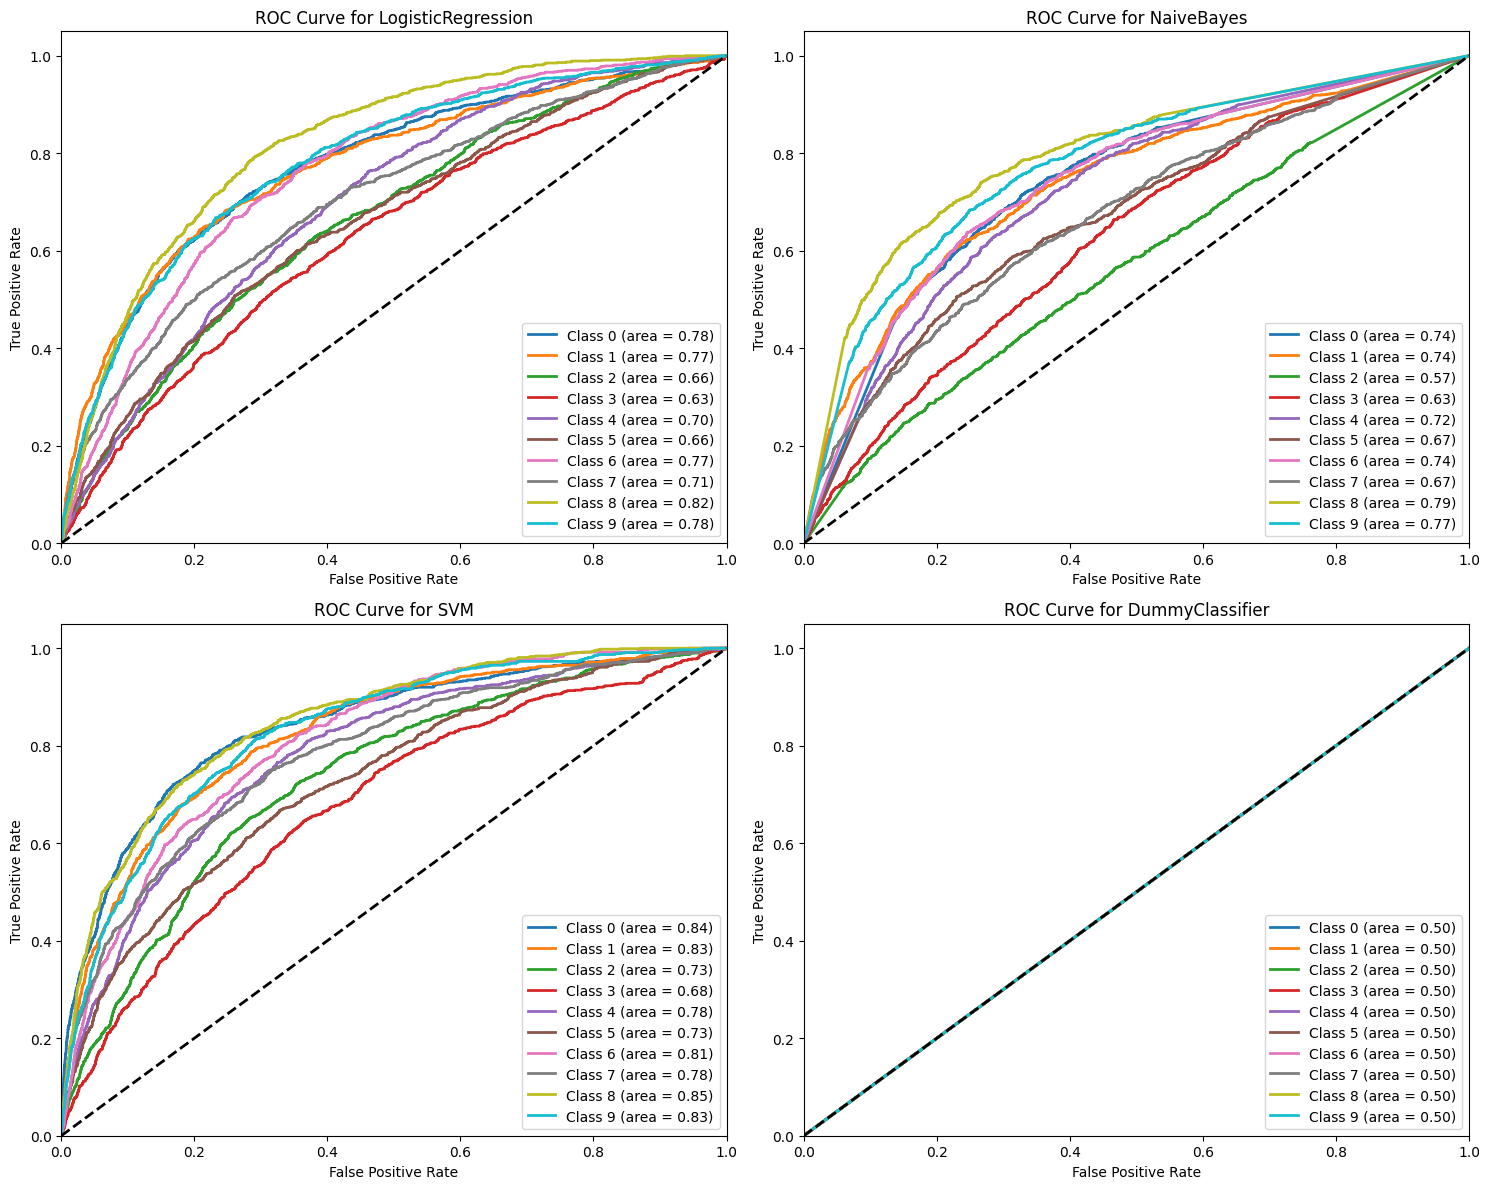

2024-06-10 22:37:41,681 - INFO - Generating combined confusion matrices for flattened data...


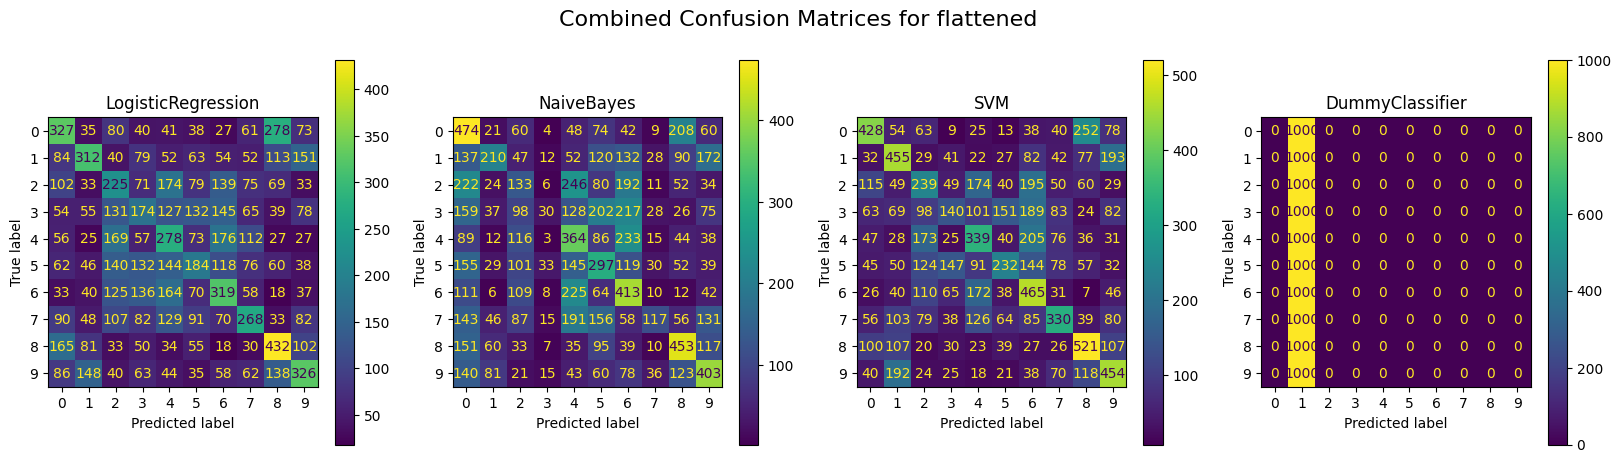

2024-06-10 22:38:02,152 - INFO - Completed processing for method: flattened
2024-06-10 22:38:02,152 - INFO - Processing method: pca
2024-06-10 22:38:02,152 - INFO - Loading data from /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/pca...
2024-06-10 22:38:02,154 - INFO - Processing classifier: LogisticRegression for method: pca
2024-06-10 22:38:02,155 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/LogisticRegression_pca.joblib
2024-06-10 22:38:02,155 - INFO - Processing classifier: NaiveBayes for method: pca
2024-06-10 22:38:02,156 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/NaiveBayes_pca.joblib
2024-06-10 22:38:02,157 - INFO - Processing classifier: SVM for method: pca
2024-06-10 22:38:02,157 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/SVM_pca.joblib
2024-06-10 22:38:02,159 - INFO - Processing classifier: DummyClassifier for method: pca
2024-

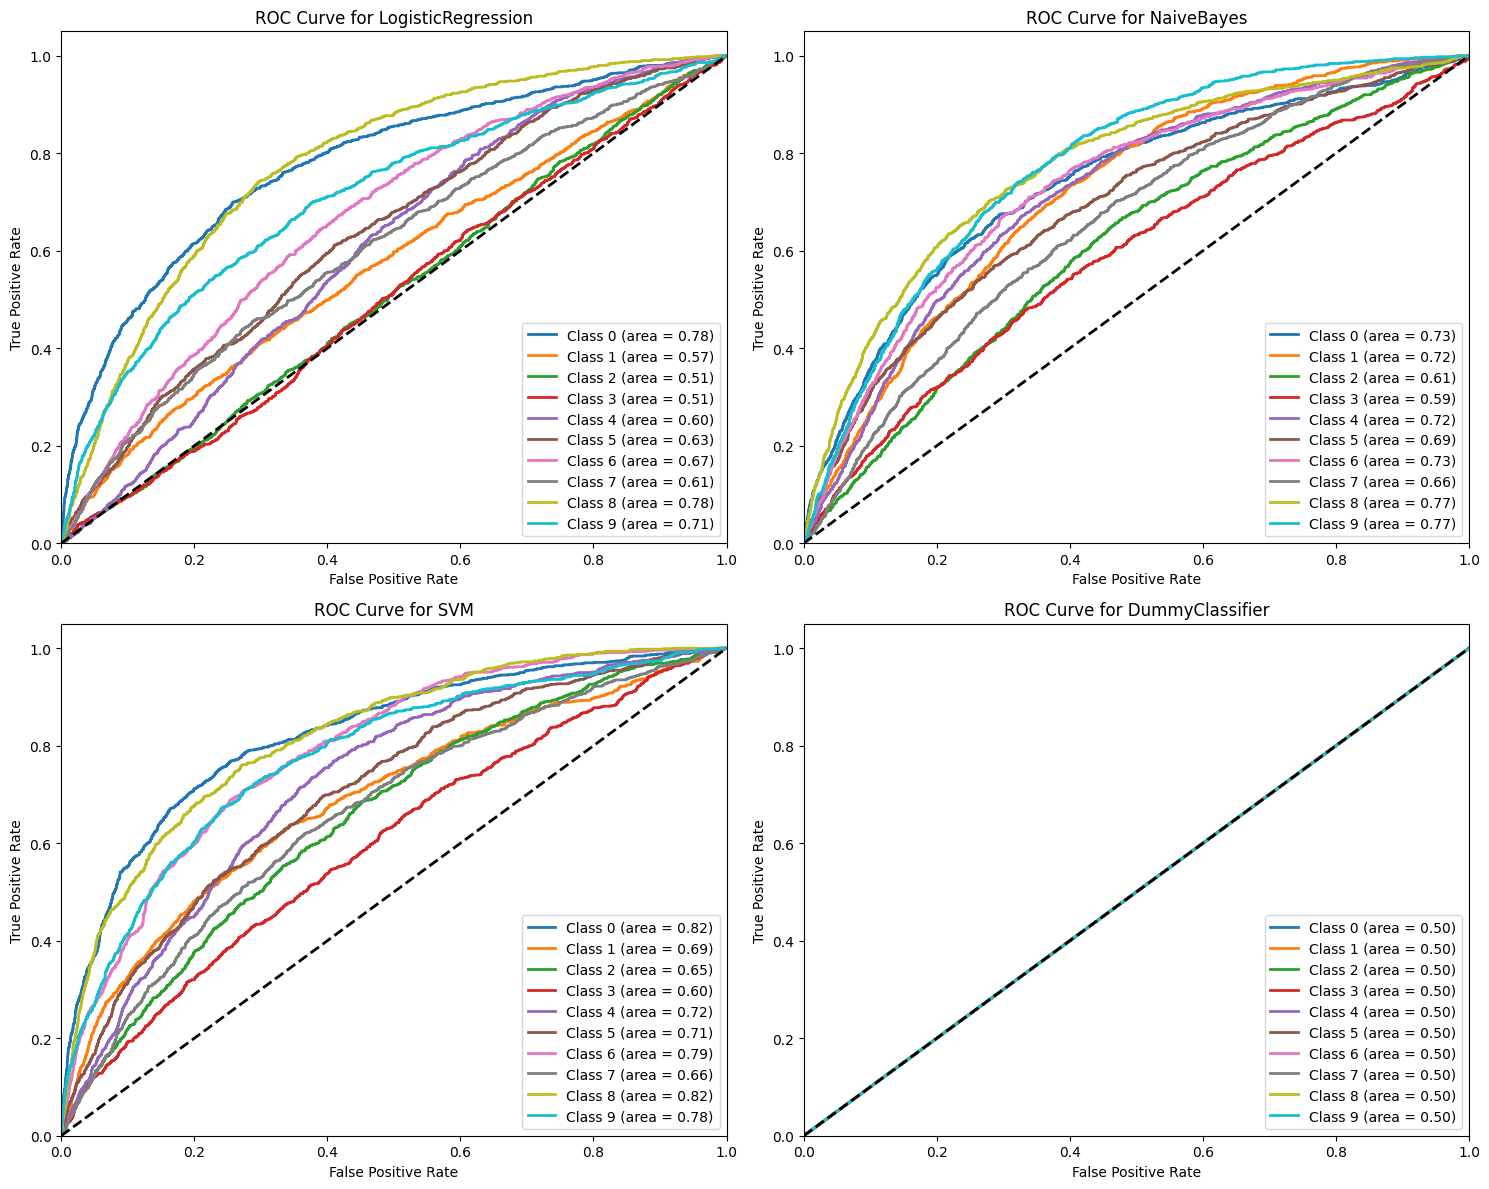

2024-06-10 22:38:03,452 - INFO - Generating combined confusion matrices for pca data...


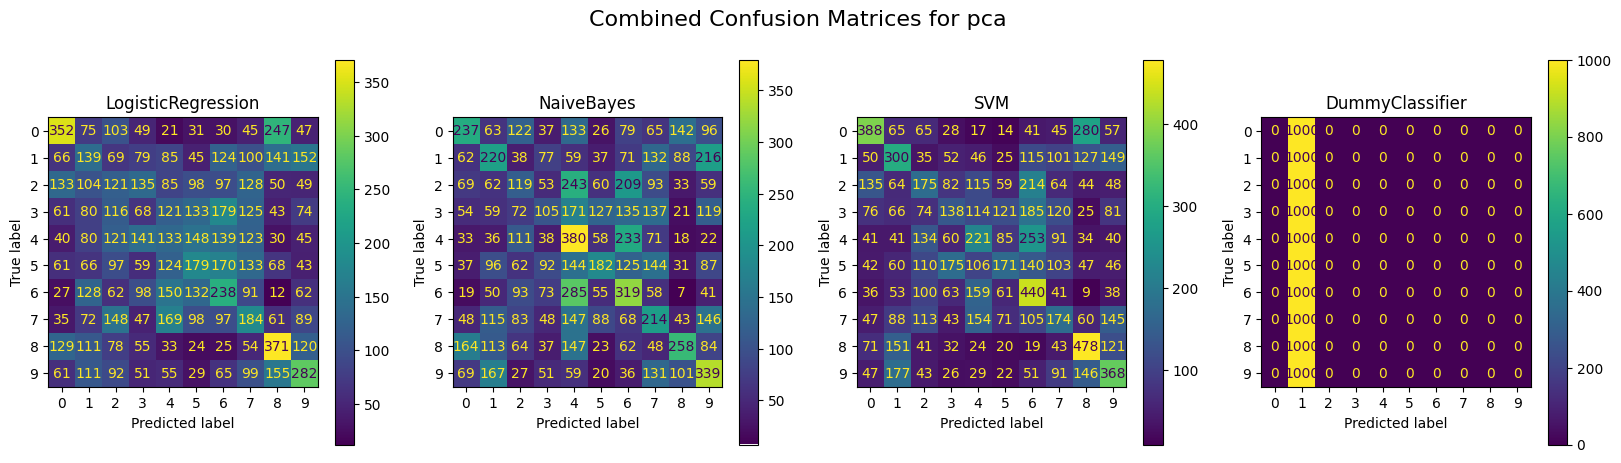

2024-06-10 22:38:04,864 - INFO - Completed processing for method: pca
2024-06-10 22:38:04,864 - INFO - Processing method: hog
2024-06-10 22:38:04,865 - INFO - Loading data from /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/hog...
2024-06-10 22:38:04,867 - INFO - Processing classifier: LogisticRegression for method: hog
2024-06-10 22:38:04,868 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/LogisticRegression_hog.joblib
2024-06-10 22:38:04,869 - INFO - Processing classifier: NaiveBayes for method: hog
2024-06-10 22:38:04,869 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/NaiveBayes_hog.joblib
2024-06-10 22:38:04,870 - INFO - Processing classifier: SVM for method: hog
2024-06-10 22:38:04,870 - INFO - Loading model from /home/victor/Epita/ING2/MLRF/cifar10_classification/models/SVM_hog.joblib
2024-06-10 22:38:04,872 - INFO - Processing classifier: DummyClassifier for method: hog
2024-06-10 

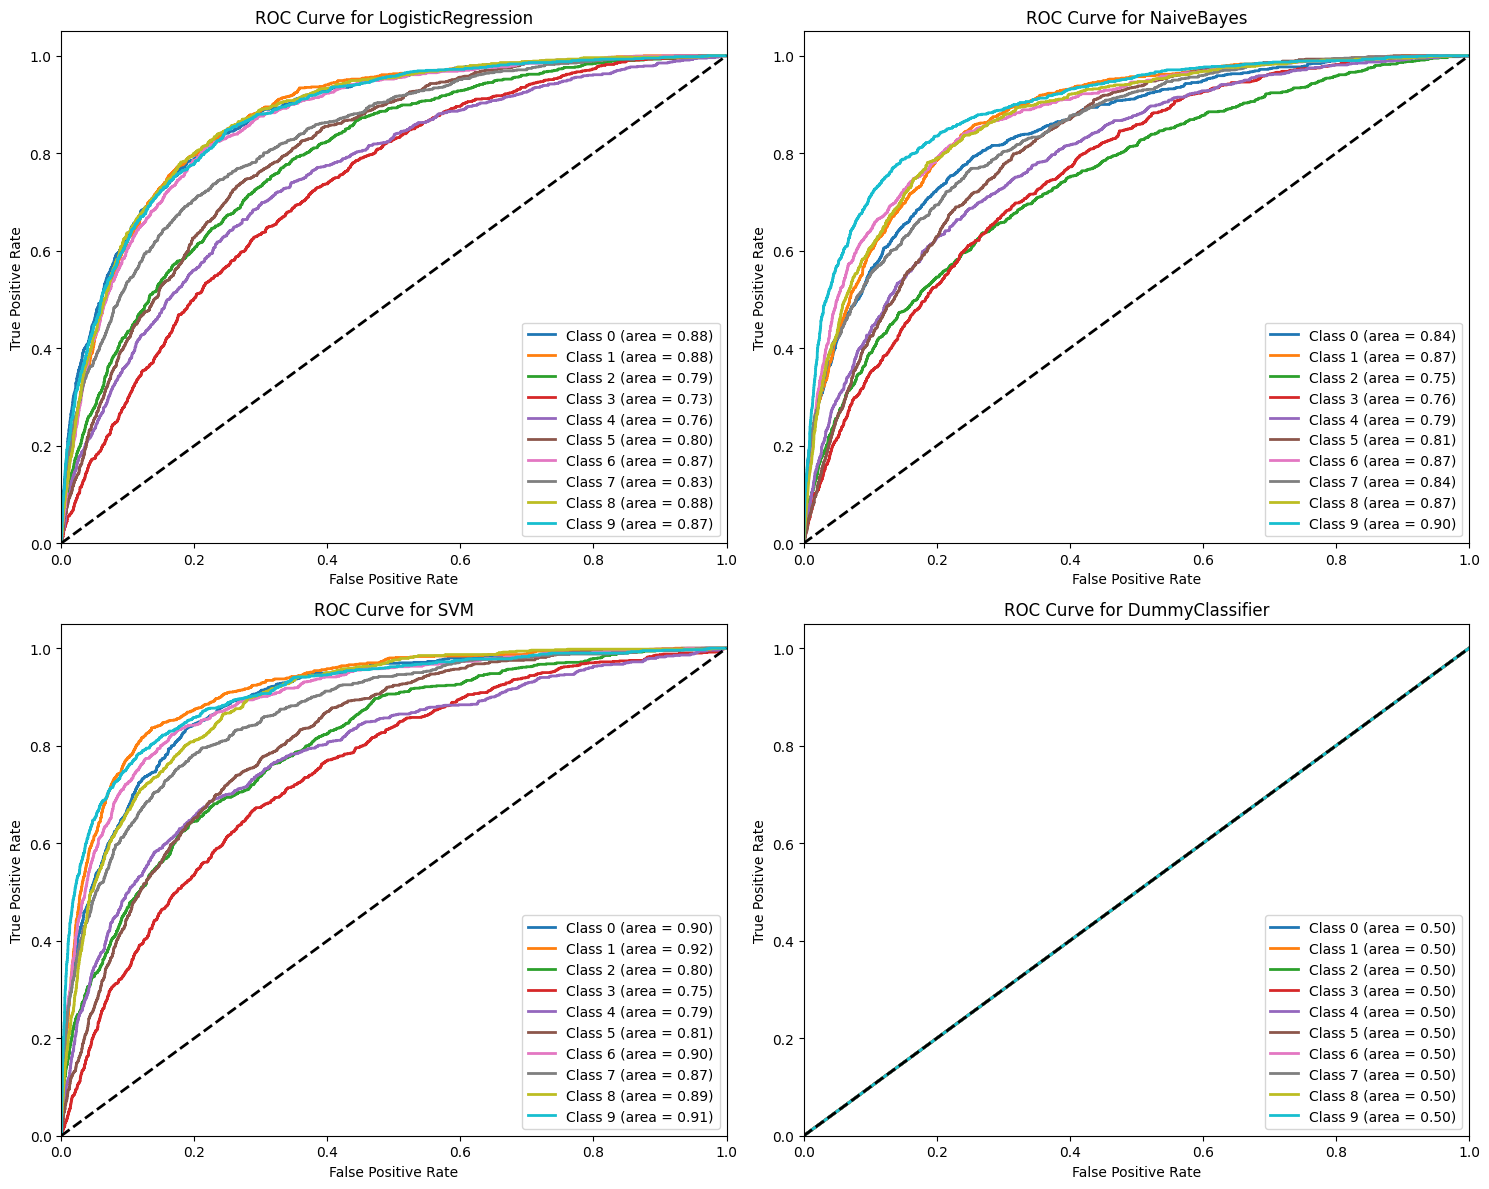

2024-06-10 22:38:07,685 - INFO - Generating combined confusion matrices for hog data...


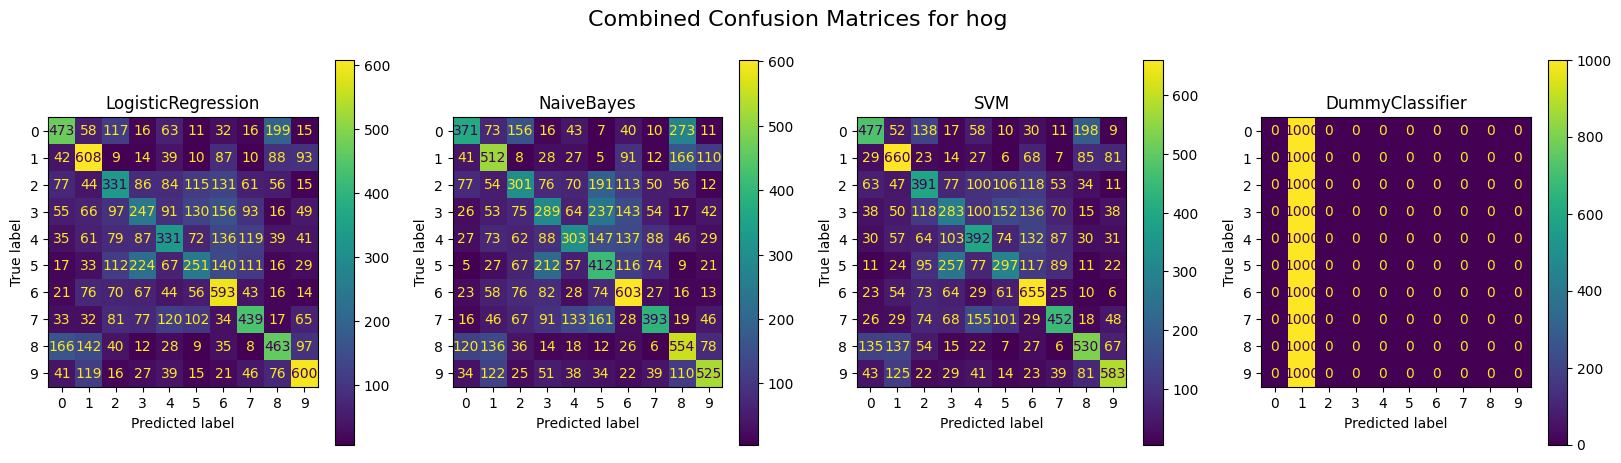

2024-06-10 22:38:10,466 - INFO - Completed processing for method: hog


In [15]:
plots.main(config.PROCESSED_DATA_DIR, config.MODELS_DIR, output_dir=None, final=False)

2024-06-11 09:38:30,946 - INFO - Loading model from ../models/SVM_hog_final.joblib


2024-06-11 09:38:31,028 - INFO - Loading data from /home/victor/Epita/ING2/MLRF/cifar10_classification/data/processed/hog...


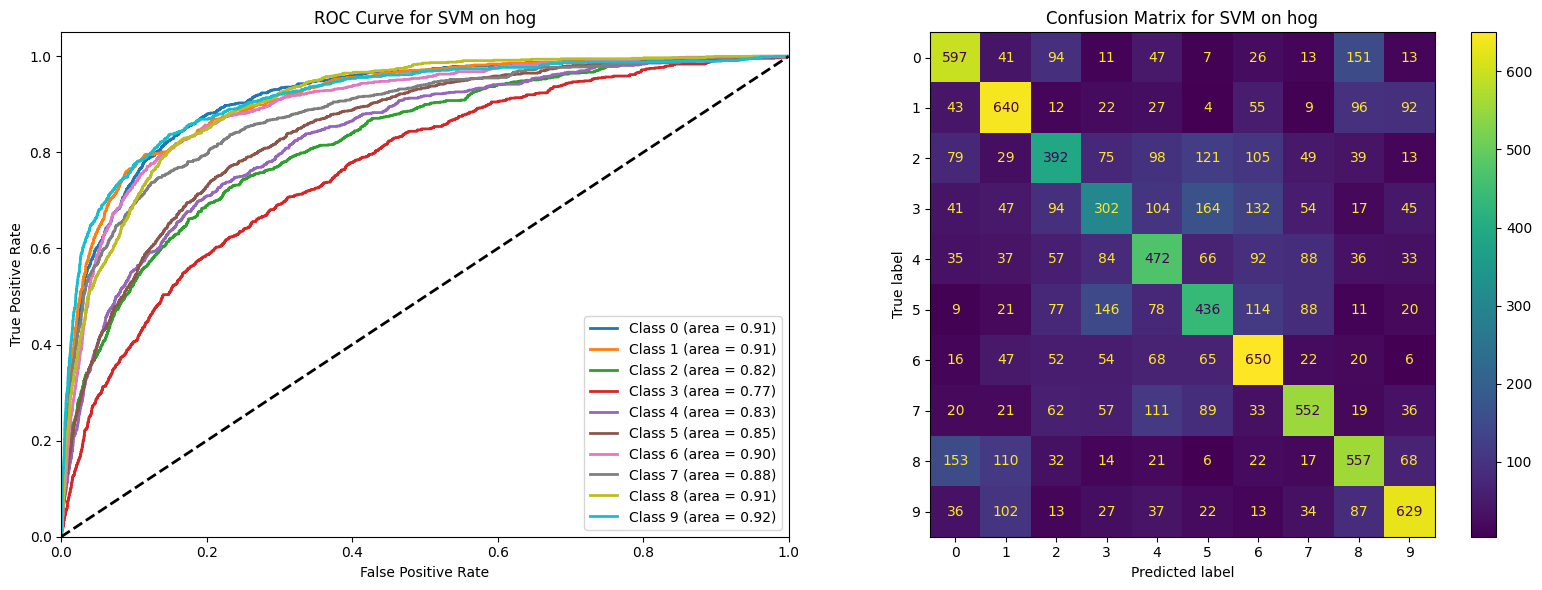

In [27]:
model_path = '../models/SVM_hog_final.joblib'
plots.evaluate_single_model(model_path, processed_dir=config.PROCESSED_DATA_DIR, output_dir=None)